# Classification Assigment 

## Data Import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('model.csv')

In [2]:
df.head(3)

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0


In [3]:
#Check for duplicates
df[df.duplicated()]

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target


# Data Preparation

## Data Incompleteness: Check for missing values

In [4]:
df.isna().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Licence_Type             True
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Seniority               False
Target                  False
dtype: bool

In [5]:
#Identification of Nan values with label N: N will be the symbol to mean NO driver licence since there is no type of Licence N
df=df.fillna('N')

## Data Imbalance

In [6]:
print(df.groupby('Target').size())

Target
0    69878
1    32473
dtype: int64


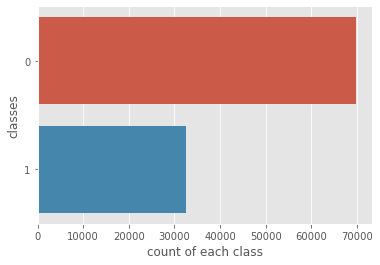

In [7]:
#Make a plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.Target ,data=df) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

## Split Categorical/Numerical Variables
It was decided to have a slighly different approach to split the attributes because it had better final results with this particular processing. 

Numerical: Annual Premium

Categorical: All other

    -Age: Because the model is Naive Bayes it was decided to create age ranges and do dummy variables. 

    -Seniority: Because the model is Naive Bayes it was decided to create age ranges and do dummy variables. 

    -Region_Code: Because represents unique codes it was decided to treat it as categorical.

    -Policy_Sales_Channel - Because represents unique codes it was decided to treat it as categorical.


In [8]:
#take out the id column and save it
column_id=df["id"]
df=df.drop(['id'], axis=1)
column_id 

0              1
1              2
2              3
3              4
4              5
           ...  
102346    102347
102347    102348
102348    102349
102349    102350
102350    102351
Name: id, Length: 102351, dtype: int64

In [9]:
df.head(10)

,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
5,Female,40,1,A,8,No,1-2 Year,Yes,34092,124,285,1
6,Male,26,1,D,46,Yes,< 1 Year,No,22452,152,59,0
7,Male,28,1,D,28,No,< 1 Year,Yes,36869,124,60,1
8,Female,23,1,B,29,No,< 1 Year,Yes,34853,152,83,0
9,Male,33,1,A,30,No,1-2 Year,Yes,27740,157,254,1


In [10]:
df.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [11]:
#Transform in type object the categorical variables
df['Region_Code']=df['Region_Code'].astype(object)
df['Driving_License']=df['Driving_License'].astype(object)
df['Policy_Sales_Channel']=df['Policy_Sales_Channel'].astype(object)
df['Seniority']=df['Seniority'].astype(object)
df['Age']=df['Age'].astype(object)

In [12]:
#Select the specific columns that are categorical variables

#Numerical

df_numerical=df.loc[:,["Annual_Premium", "Target"]]
df_numerical


,Annual_Premium,Target
0,25741,0
1,2630,0
2,70720,0
3,48512,0
4,32169,0
...,...,...
102346,34695,0
102347,30564,1
102348,52844,1
102349,26343,0


In [13]:
#Categorical 
df_categorical=df.iloc[:,[0,1,2,3,4,5,6,7,9,10,11]]
df_categorical


,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Seniority,Target
0,Female,44,1,M,30,No,1-2 Year,Yes,154,152,0
1,Male,23,1,M,3,Yes,< 1 Year,No,152,256,0
2,Male,43,1,C,28,No,1-2 Year,Yes,52,224,0
3,Male,60,1,B,28,Yes,1-2 Year,No,26,86,0
4,Female,42,1,B,46,No,1-2 Year,Yes,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...
102346,Female,25,1,B,32,Yes,< 1 Year,No,152,133,0
102347,Female,47,1,M,28,No,1-2 Year,Yes,26,114,1
102348,Male,72,1,M,8,No,> 2 Years,Yes,124,92,1
102349,Female,25,1,M,11,Yes,< 1 Year,No,152,127,0


## Categorical Attributes 

In [14]:
df_categorical.dtypes

Gender                  object
Age                     object
Driving_License         object
Licence_Type            object
Region_Code             object
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Policy_Sales_Channel    object
Seniority               object
Target                   int64
dtype: object

In [15]:
#Bining of Age variables 
df_categorical['Age_int'] = pd.cut(x=df_categorical['Age'],bins=[1,30,40,50,60,70,90], include_lowest=True, precision=0)
df_categorical.head()


,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Seniority,Target,Age_int
0,Female,44,1,M,30,No,1-2 Year,Yes,154,152,0,"(40, 50]"
1,Male,23,1,M,3,Yes,< 1 Year,No,152,256,0,"(0, 30]"
2,Male,43,1,C,28,No,1-2 Year,Yes,52,224,0,"(40, 50]"
3,Male,60,1,B,28,Yes,1-2 Year,No,26,86,0,"(50, 60]"
4,Female,42,1,B,46,No,1-2 Year,Yes,124,132,0,"(40, 50]"


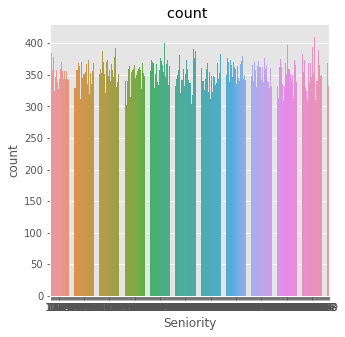

In [16]:
plt.figure(figsize = (5,5))
sns.countplot(df_categorical['Seniority'])
plt.title("count ")
plt.show()

In [17]:
#Bining of Seniority
df_categorical['Seniority_int'] = pd.cut(x=df_categorical['Seniority'],bins=[1,50,100,150,200,250,300], include_lowest=True, precision=0)
df_categorical.head()

,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Seniority,Target,Age_int,Seniority_int
0,Female,44,1,M,30,No,1-2 Year,Yes,154,152,0,"(40, 50]","(150, 200]"
1,Male,23,1,M,3,Yes,< 1 Year,No,152,256,0,"(0, 30]","(250, 300]"
2,Male,43,1,C,28,No,1-2 Year,Yes,52,224,0,"(40, 50]","(200, 250]"
3,Male,60,1,B,28,Yes,1-2 Year,No,26,86,0,"(50, 60]","(50, 100]"
4,Female,42,1,B,46,No,1-2 Year,Yes,124,132,0,"(40, 50]","(100, 150]"


In [18]:
#Region Code: Inspection of it's distribution

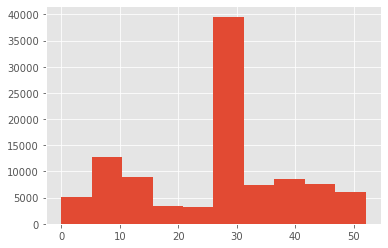

In [19]:
df_categorical['Region_Code'].hist()

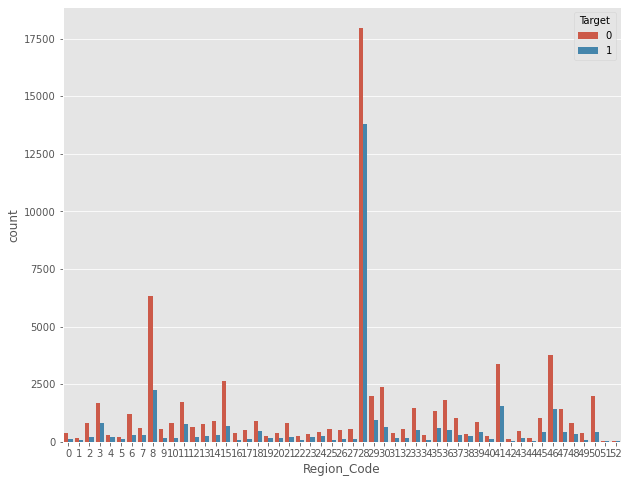

In [20]:
import seaborn as sns
plt.figure(figsize = (10,8))
bar_plot=sns.countplot(x="Region_Code", hue="Target", data=df_categorical)


In [21]:
#We have 1 specific values (28) which has the majority of observations
df_categorical['Region_Code'].value_counts().head(10)

28    31765
8      8605
46     5182
41     4926
15     3301
30     3008
29     2932
3      2482
11     2470
50     2447
Name: Region_Code, dtype: int64

In [22]:
#Bining of Region Code by grouping values according to quantiles to create equal sized groupings of the data. 
#We know a priori that the specific values that account for majority of observations will have bigger impact when creating this intervals 
#-> at the end will give "more importance to region_code 28" and at the same time is a general rule that can be applied to other types of distributions
df_categorical['Region_Code_int']=pd.qcut(df_categorical['Region_Code'], q=3, precision=0)

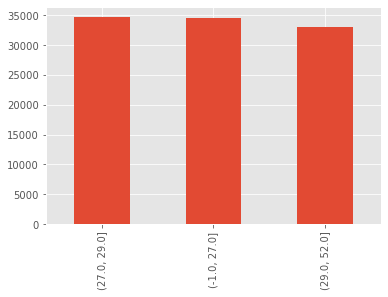

In [23]:
df_categorical['Region_Code_int'].value_counts().plot(kind='bar')

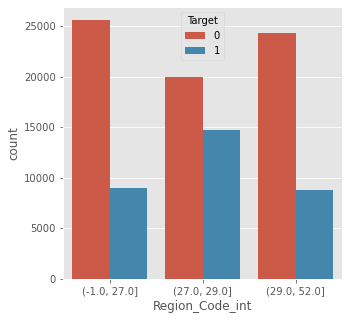

In [24]:
plt.figure(figsize = (5,5))
bar_plot=sns.countplot(x="Region_Code_int", hue="Target", data=df_categorical)

In [25]:
#Bining of Policy_Sales_Channel

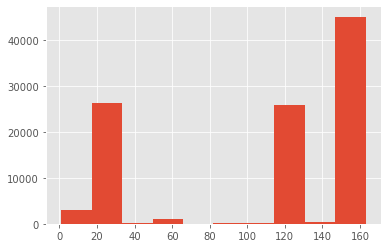

In [26]:
df_categorical['Policy_Sales_Channel'].hist()

In [27]:
#It has 3 specific codes with majority of observations and many observations with very few number of observations (like = 1)
df_categorical['Policy_Sales_Channel'].value_counts()

152    29978
26     24504
124    22317
160     4778
156     3424
       ...  
62         1
58         1
50         1
38         1
82         1
Name: Policy_Sales_Channel, Length: 142, dtype: int64

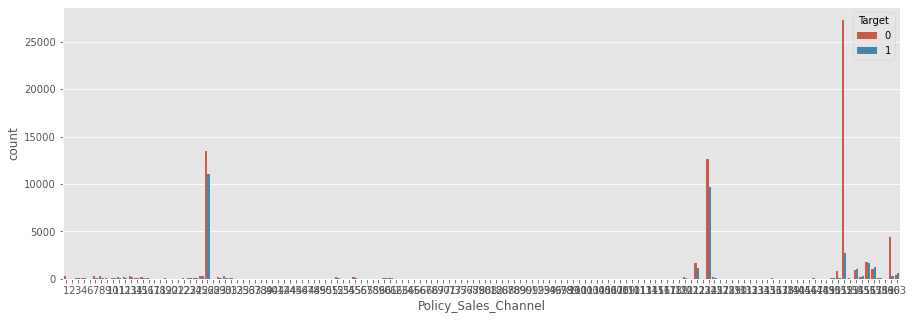

In [28]:
#We can see 4 important regions on the distribution, around 26, 124, 152 and after 152 
import seaborn as sns
plt.figure(figsize = (15,5))
bar_plot=sns.countplot(x="Policy_Sales_Channel", hue="Target", data=df_categorical)

In [29]:
df_categorical['Policy_Sales_Channel_int']=pd.qcut(df_categorical['Policy_Sales_Channel'], q=4, precision=0)

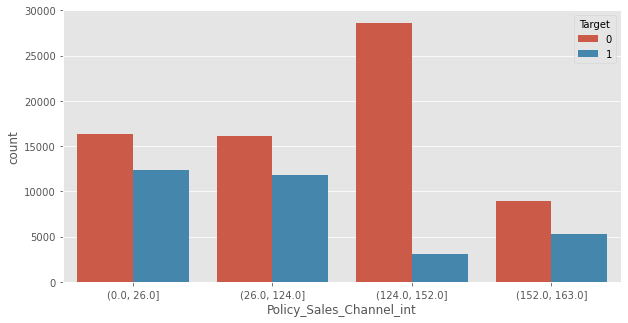

In [30]:
import seaborn as sns
plt.figure(figsize = (10,5))
bar_plot=sns.countplot(x="Policy_Sales_Channel_int", hue="Target", data=df_categorical)

In [31]:
df_categorical.isna().sum()

Gender                      0
Age                         0
Driving_License             0
Licence_Type                0
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Policy_Sales_Channel        0
Seniority                   0
Target                      0
Age_int                     0
Seniority_int               0
Region_Code_int             0
Policy_Sales_Channel_int    0
dtype: int64

In [32]:
#Get dummies: We drop driving_license cause licence_type=N already embodies the meaning of having or not having driving license
dummies = pd.get_dummies(df_categorical[['Gender','Licence_Type','Previously_Insured', 'Region_Code_int', 'Policy_Sales_Channel_int', 'Vehicle_Damage', 'Vehicle_Age', 'Age_int', 'Seniority_int']],drop_first=True) 
#dummies_1= pd.get_dummies(df_categorical[['Region_Code_int', 'Policy_Sales_Channel_int']]) # Don't drop_first in this variable cause the 3 classes can be usefull

dummies.tail()

,Gender_Male,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M,Licence_Type_N,Previously_Insured_Yes,"Region_Code_int_(27.0, 29.0]","Region_Code_int_(29.0, 52.0]","Policy_Sales_Channel_int_(26.0, 124.0]",...,"Age_int_(30, 40]","Age_int_(40, 50]","Age_int_(50, 60]","Age_int_(60, 70]","Age_int_(70, 90]","Seniority_int_(50, 100]","Seniority_int_(100, 150]","Seniority_int_(150, 200]","Seniority_int_(200, 250]","Seniority_int_(250, 300]"
102346,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
102347,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
102348,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
102349,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
102350,1,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0


In [33]:
df_categorical= pd.concat([dummies,df_categorical[['Target']]], axis = 1)
df_categorical

,Gender_Male,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M,Licence_Type_N,Previously_Insured_Yes,"Region_Code_int_(27.0, 29.0]","Region_Code_int_(29.0, 52.0]","Policy_Sales_Channel_int_(26.0, 124.0]",...,"Age_int_(40, 50]","Age_int_(50, 60]","Age_int_(60, 70]","Age_int_(70, 90]","Seniority_int_(50, 100]","Seniority_int_(100, 150]","Seniority_int_(150, 200]","Seniority_int_(200, 250]","Seniority_int_(250, 300]",Target
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
102347,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
102348,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
102349,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


IndexError: index 24 is out of bounds for axis 0 with size 24

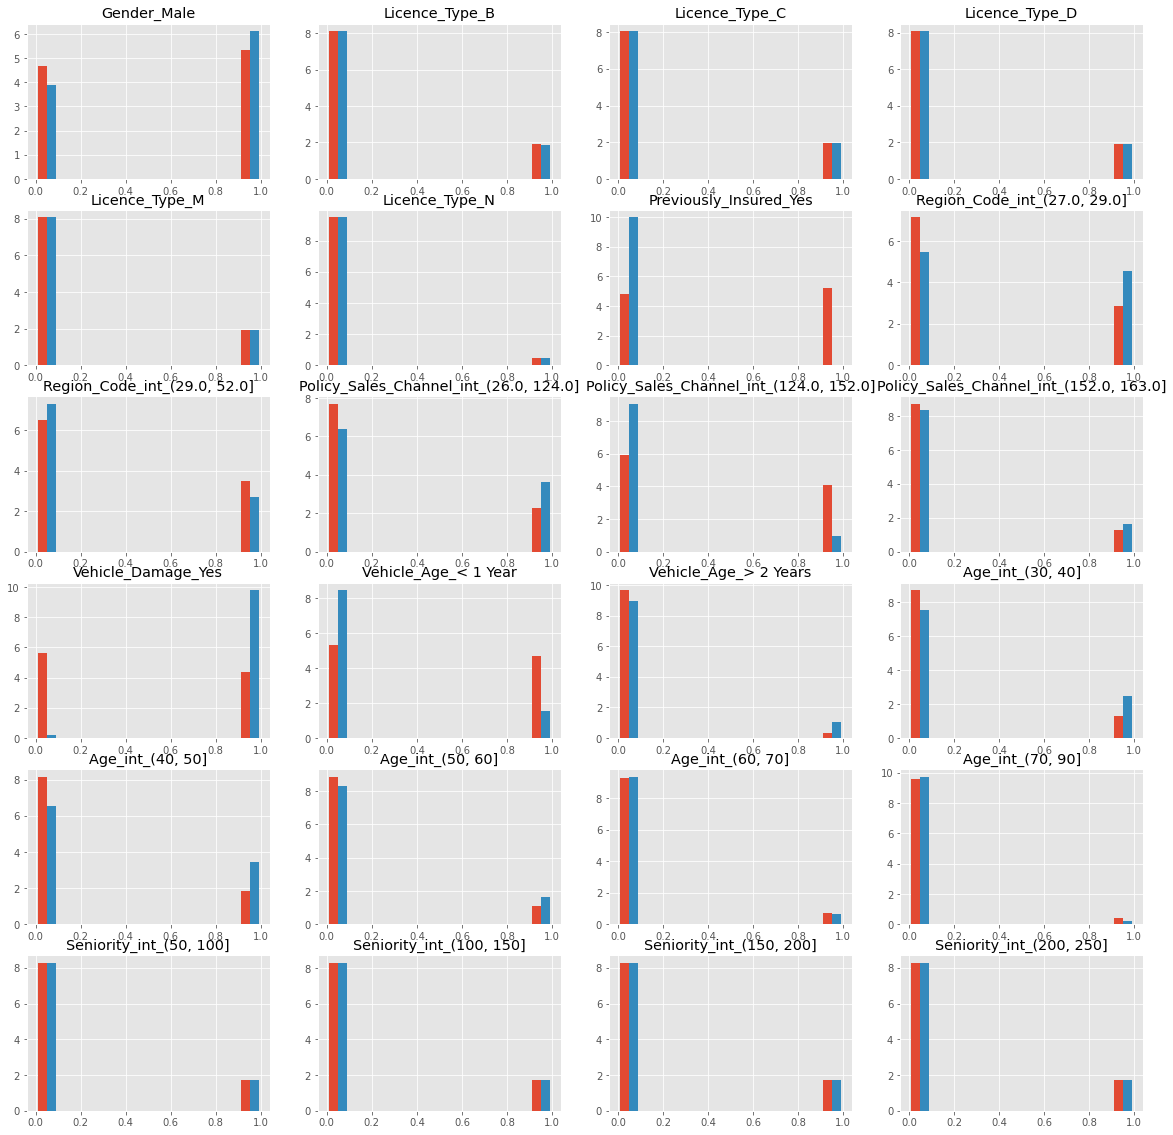

In [37]:
#See distribution of categorical variables on targat response
df_0=df_categorical[df['Target']==0] # records wih target==1
df_1=df_categorical[df['Target']==1] # records wih target==0


fig, axes = plt.subplots(6, 4,figsize=[20,20])
axes = axes.flatten()
i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()

In [ ]:
#Some conclusions:
#Seniority and Licenses do not seem candidates to explain target responses

## Numerical Attributes

In [38]:
df_numerical.describe()

,Annual_Premium,Target
count,102351.000000,102351.000000
mean,30748.636398,0.317271
std,17544.726810,0.465416
min,2630.000000,0.000000
25%,24435.500000,0.000000
50%,31943.000000,0.000000
75%,39774.000000,1.000000
max,540165.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008170C33E50>,
      dtype=object)

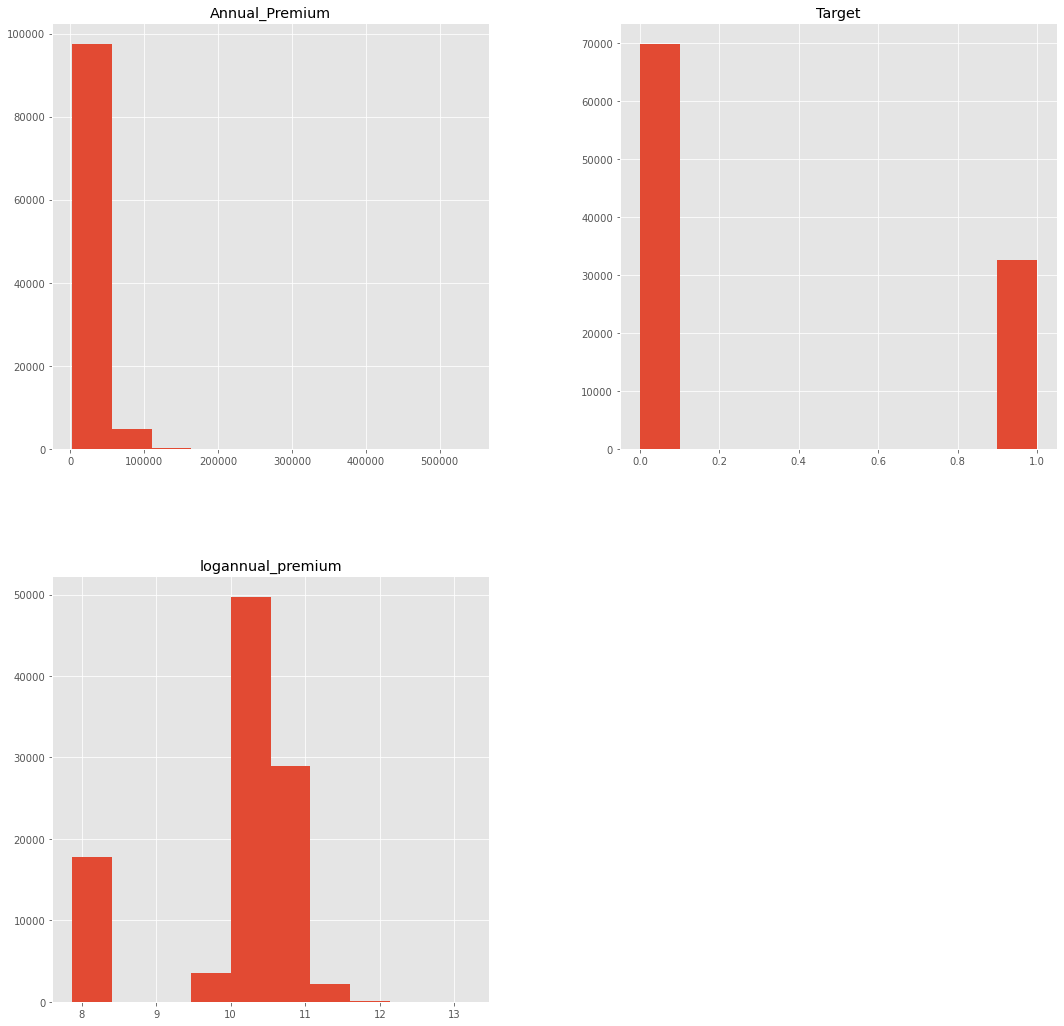

In [39]:
import math
pd.options.mode.chained_assignment = None

df_numerical['logannual_premium']=df_numerical['Annual_Premium'].apply(math.log)
df_numerical.hist(figsize=(18,18))

In [40]:
#put target in last column 
target = df_numerical[["Target"]]

df_t = df_numerical.drop("Target",1)
df_numerical = pd.concat([df_t,target], axis = 1)

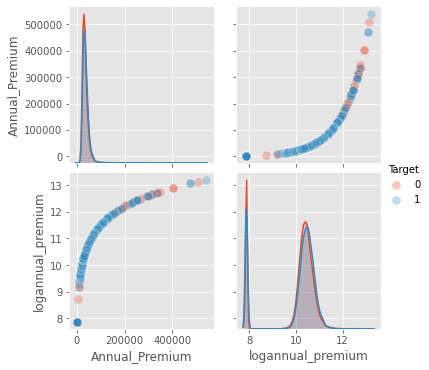

In [41]:
import seaborn as sns
sns.pairplot(df_numerical, hue='Target', plot_kws = {'alpha': 0.3,'s': 80})

In [ ]:
#Some Conclusions:
#This attribute does not seem capable of separate between the 2 classes

## Standardize

In [42]:
#Standardize by using StandardScaler()
from sklearn.preprocessing import StandardScaler

#df_num_subset=df_numerical[['Age', 'Seniority', 'logannual_premium']]
#df_num_subset
scaler = StandardScaler().fit(df_numerical )
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df
scaled_df.columns = df_numerical.columns
scaled_df.index=df_numerical.index
scaled_df

,Annual_Premium,logannual_premium,Target
0,-0.285423,0.139586,-0.681696
1,-1.602691,-2.106621,-0.681696
2,2.278266,1.134769,-0.681696
3,1.012467,0.763617,-0.681696
4,0.080957,0.359094,-0.681696
...,...,...,...
102346,0.224933,0.433530,-0.681696
102347,-0.010524,0.308696,1.466929
102348,1.259380,0.847842,1.466929
102349,-0.251110,0.162349,-0.681696


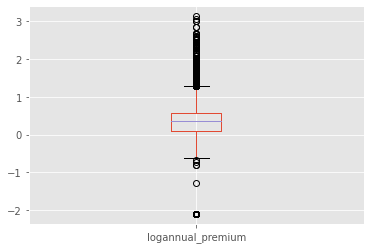

In [43]:
scaled_df[["logannual_premium"]].boxplot()

## Final Dataset 

In [44]:
#Finaly put together the entire dataset
dataset_df= pd.concat([scaled_df[['logannual_premium']], df_categorical], axis=1)
dataset_df

,logannual_premium,Gender_Male,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M,Licence_Type_N,Previously_Insured_Yes,"Region_Code_int_(27.0, 29.0]","Region_Code_int_(29.0, 52.0]",...,"Age_int_(40, 50]","Age_int_(50, 60]","Age_int_(60, 70]","Age_int_(70, 90]","Seniority_int_(50, 100]","Seniority_int_(100, 150]","Seniority_int_(150, 200]","Seniority_int_(200, 250]","Seniority_int_(250, 300]",Target
0,0.139586,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,-2.106621,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.134769,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0.763617,1,1,0,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0.359094,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,0.433530,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
102347,0.308696,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
102348,0.847842,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
102349,0.162349,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
## PREPARE DATASET FOR MODEL 

In [46]:
y=dataset_df['Target']
dataset_df=dataset_df.drop(['Target'], axis=1)
dataset_df


,logannual_premium,Gender_Male,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M,Licence_Type_N,Previously_Insured_Yes,"Region_Code_int_(27.0, 29.0]","Region_Code_int_(29.0, 52.0]",...,"Age_int_(30, 40]","Age_int_(40, 50]","Age_int_(50, 60]","Age_int_(60, 70]","Age_int_(70, 90]","Seniority_int_(50, 100]","Seniority_int_(100, 150]","Seniority_int_(150, 200]","Seniority_int_(200, 250]","Seniority_int_(250, 300]"
0,0.139586,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,-2.106621,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.134769,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0.763617,1,1,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0.359094,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,0.433530,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
102347,0.308696,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
102348,0.847842,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
102349,0.162349,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


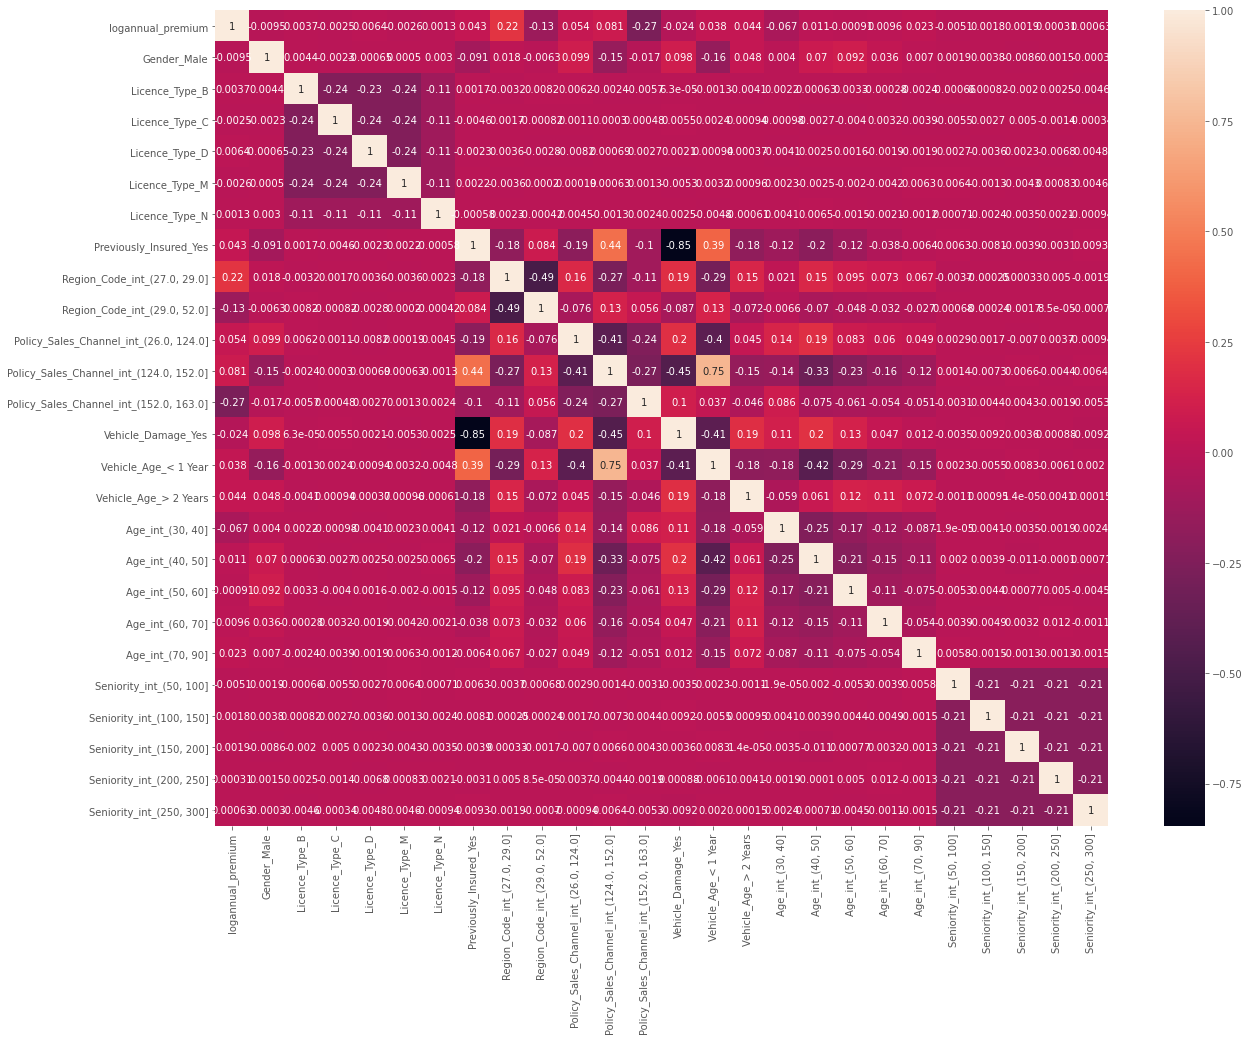

In [409]:
#Check Correlation Matrix to try to select features
import seaborn as sn
corrMatrix = dataset_df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True)

## Feature Selection

In [47]:
#After taking into consideration Corr matrix, Univariate Distributions and Histograms of categorical variables and try several combination:
# Drop features: Vehicle Age <1year (based on corr matrix), logannual_premium (based on univariate distribution), all licence_types and seniority (based on histogram distribution on target response)

dataset_df=dataset_df.drop(['Licence_Type_B', 'Licence_Type_C', 'Licence_Type_D', 'Licence_Type_M', 'Licence_Type_N', 'logannual_premium', 'Seniority_int_(150, 200]', 'Seniority_int_(200, 250]', 'Seniority_int_(250, 300]','Seniority_int_(50, 100]', 'Seniority_int_(100, 150]', 'Vehicle_Age_< 1 Year'], axis=1)
dataset_df

,Gender_Male,Previously_Insured_Yes,"Region_Code_int_(27.0, 29.0]","Region_Code_int_(29.0, 52.0]","Policy_Sales_Channel_int_(26.0, 124.0]","Policy_Sales_Channel_int_(124.0, 152.0]","Policy_Sales_Channel_int_(152.0, 163.0]",Vehicle_Damage_Yes,Vehicle_Age_> 2 Years,"Age_int_(30, 40]","Age_int_(40, 50]","Age_int_(50, 60]","Age_int_(60, 70]","Age_int_(70, 90]"
0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
1,1,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,1,1,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,0,1,0,1,0,1,0,0,0,0,0,0,0,0
102347,0,0,1,0,0,0,0,1,0,0,1,0,0,0
102348,1,0,0,0,1,0,0,1,1,0,0,0,0,1
102349,0,1,0,0,0,1,0,0,0,0,0,0,0,0


## Separate Train/Test sets

In [48]:


from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(dataset_df, y, 
                                                    test_size =0.3, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(71645, 14) (30706, 14)


## Naive Bayes Model

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

In [52]:
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) 
    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

In [50]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import  BernoulliNB

model = GaussianNB()

m=model.fit(X_train, y_train)
x_pred=m.predict(X_train)
y_pred=m.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(x_pred, y_train))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.6891792888419402
f1_test:  0.6880492091388402
[[14283  6681]
 [ 1129  8613]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.79     20964
           1       0.56      0.88      0.69      9742

    accuracy                           0.75     30706
   macro avg       0.74      0.78      0.74     30706
weighted avg       0.81      0.75      0.75     30706



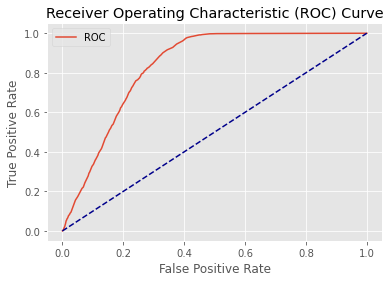

AUC: 0.83


In [53]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train, y_train,X_test,y_test)
